In [ ]:
## to access the google drive with the google account
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import cv2
import matplotlib.pyplot as plt

[8, 0, 24, 46]


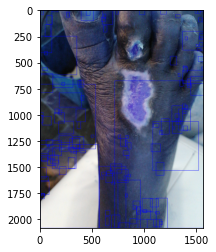

In [ ]:

#refined 1
images = 'CD00000617_20210929074940_0002_20211025085524_20211025_085631.jpg'

folder = images[0:10]
image_path = '/content/drive/MyDrive/Skin_Disease/Skin_Images/' + folder + '/' + images + ''
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
dst = cv2.Canny(gray, 0, 150)
blurred = cv2.blur(dst, (5,5), 0)    
MIN_CONTOUR_AREA=200
img_thresh1 = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
img_thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
Contours, imgContours = cv2.findContours(img_thresh1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for contour in Contours:
    if cv2.contourArea(contour) > MIN_CONTOUR_AREA:
        [X, Y, W, H] = cv2.boundingRect(contour)
        box = cv2.rectangle(img, (X, Y), (X + W, Y + H), (0,0,255), 2)

new_image = img[Y:Y+H, X:X+W]
plt.imshow(new_image)
cv2.imwrite('new.png', new_image)

plt.imshow(img)